Performs basic k-means clustering through the explained variance after assuming four factors. Referenced https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

In [24]:
df = pd.read_csv('individual_scores.tsv', index_col=0, sep="\t")
df.head()

,MR1,MR2,MR3,MR4
2,-1.947780,-0.028630,-0.451377,-1.254058
3,-1.445046,0.856991,-1.084240,-0.220307
5,-0.173537,-0.522505,-2.012131,0.133175
6,-0.663552,0.244884,0.895172,0.318862
7,-0.598100,1.022295,2.408438,-0.085635


In [25]:
print(df.shape)

(100, 4)


In [26]:
def kmean(df, numClusters):
    model = KMeans(n_clusters = numClusters, random_state = 10)
    labels = model.fit_predict(df.values)
    print(labels)
    
    # Determine the silhouette score average
    silhouette_avg = silhouette_score(df.values, labels)
    print(silhouette_avg)
    
    # Silhouette score for each participant
    participant_silhouette = silhouette_samples(df.values, labels)
    
    # Plot silhouette and clusters
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    ax1.set_xlim([-0.25, 1])
    ax1.set_ylim([0, len(df.values) + (numClusters + 1) * 10])
    y_lower = 10
    
    for i in range(numClusters):
        ith_silhouette = participant_silhouette[labels == i]
        ith_silhouette.sort()
        
        size_i = ith_silhouette.shape[0]
        y_upper = y_lower + size_i
        
        color = cm.nipy_spectral(float(i) / numClusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, 
                                  ith_silhouette, facecolor = color, 
                                  edgecolor = color, alpha = 0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_i, str(i))
        
        y_lower = y_upper + 10
    
    ax1.set_title("Silhouette plot")
    ax1.set_xlabel("Silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle = "--")
    ax1.set_yticks([])
    
    # Show actual clusters (needs to be corrected, not sure what to plot here)
    colors = cm.nipy_spectral(labels.astype(float)/numClusters)
    ax2.scatter(df.values[:, 0], df.values[:, 1], marker=',',
               s = 30, lw = 0, alpha = 0.7, c=colors, edgecolor='k')
    
    plt.show()

[1 1 1 0 0 1 0 1 0 0 2 1 2 0 2 2 1 2 1 2 0 0 0 1 0 2 2 0 1 1 0 2 2 2 0 2 1
 0 2 1 2 2 1 1 1 1 2 0 0 2 0 2 2 0 2 0 1 1 2 1 1 2 0 0 1 1 1 0 1 1 0 0 2 2
 0 0 2 0 2 0 0 2 0 2 2 0 2 2 1 2 2 2 1 2 1 1 2 0 0 0]
0.220988736428


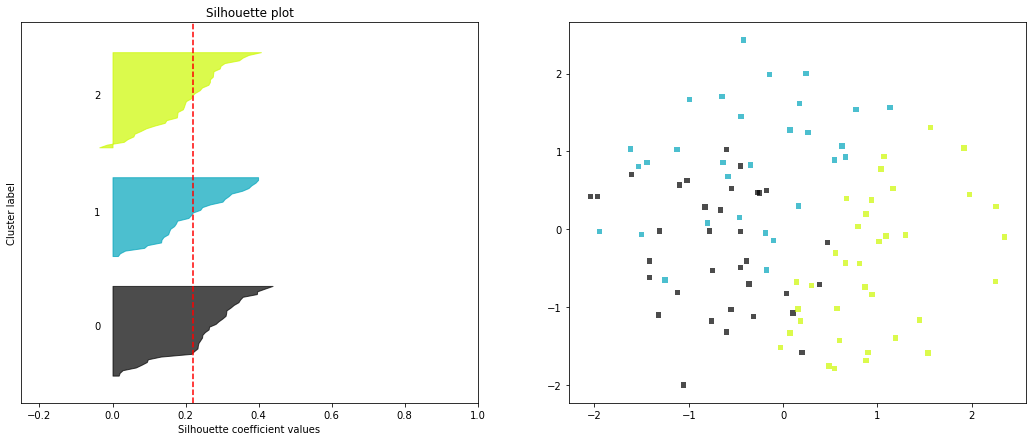

In [27]:
kmean(df, 3)

[0 0 0 2 2 0 2 0 1 2 1 0 0 1 0 1 0 1 0 1 3 2 2 0 2 1 1 2 0 0 3 1 1 1 3 1 0
 3 1 0 1 1 0 0 2 2 0 3 3 1 2 1 1 2 0 3 0 0 1 2 0 0 2 2 0 0 0 3 0 0 2 2 1 1
 2 3 1 3 1 3 3 1 2 1 1 3 1 1 0 1 1 1 0 1 0 0 1 2 3 2]
0.227157573972


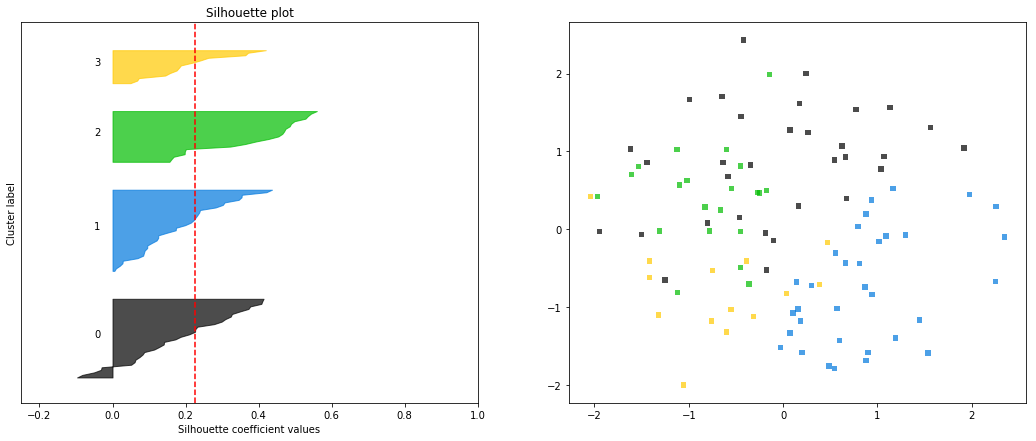

In [28]:
kmean(df, 4)

[1 4 0 1 1 4 1 4 2 2 0 4 4 2 4 0 4 0 4 0 2 1 1 4 1 0 0 1 4 4 2 0 2 0 2 0 4
 3 2 4 2 0 4 0 1 1 4 2 2 0 1 0 0 1 4 2 4 4 0 1 1 4 1 1 4 0 1 2 4 2 1 1 0 0
 2 2 0 2 0 2 2 1 1 0 0 2 0 2 1 0 0 2 4 0 4 4 0 1 2 2]
0.223923785187


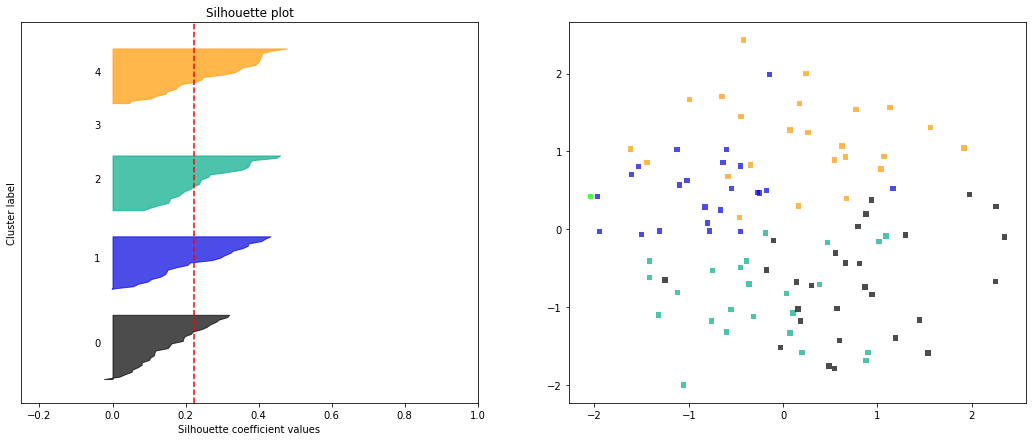

In [29]:
kmean(df, 5)

[5 5 0 4 4 5 4 5 1 1 0 5 2 1 2 0 5 0 5 0 1 4 4 2 4 0 0 4 2 2 1 2 1 0 1 0 2
 3 1 5 0 2 2 0 4 5 2 1 1 2 4 0 2 4 2 1 5 4 0 5 5 2 4 4 5 5 5 1 2 1 4 4 0 0
 1 1 0 1 0 1 1 2 4 2 0 1 2 1 5 0 2 1 5 0 5 5 0 4 1 1]
0.230827668719


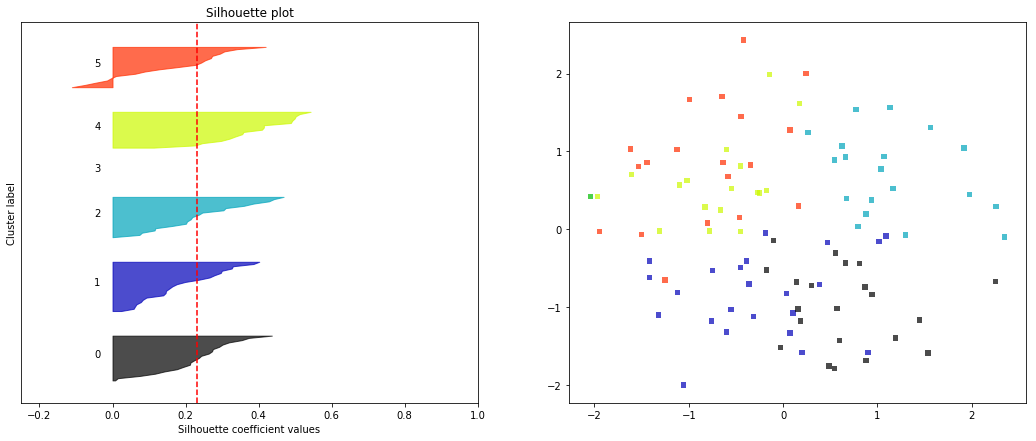

In [30]:
kmean(df, 6)

In [31]:
def elbow(df, rand_state, max_num):
    distortions = []
    all_c = range(1,max_num)
    for c in all_c:
        model = KMeans(n_clusters = c, random_state = rand_state)
        model.fit(df.values)
        distortions.append(model.inertia_)

    print(distortions)
    plt.plot(all_c, distortions)
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.show() 

[396.00000000000017, 303.30607918591397, 246.21985127033798, 210.13971933840861, 181.43423754317729, 156.66264970531233, 135.96713027045541, 120.43000464249849, 112.41580495897557]


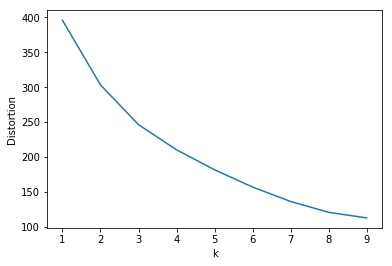

In [33]:
elbow(df, 20, 10)